In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.datasets import make_classification  # Générer un jeu de données factice
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

In [2]:
# Charger les fichiers CSV
employee_survey_data = pd.read_csv("/content/pharmacie/employee_survey_data.csv")
general_data = pd.read_csv("/content/pharmacie/general_data.csv")
in_time_data = pd.read_csv("/content/pharmacie/in_time.csv")
out_time_data = pd.read_csv("/content/pharmacie/out_time.csv")
manager_survey_data = pd.read_csv("/content/pharmacie/manager_survey_data.csv")

print("les données de employee_survey_data")
#Afficher les données
print(employee_survey_data.head())
print()


les données de employee_survey_data
   EmployeeID  EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance
0           1                      3.0              4.0              2.0
1           2                      3.0              2.0              4.0
2           3                      2.0              2.0              1.0
3           4                      4.0              4.0              3.0
4           5                      4.0              1.0              3.0



In [3]:
#voir la taille des données
print("voici la taille des données de emplyee_survey_data:")
print(employee_survey_data.shape)
print()


voici la taille des données de emplyee_survey_data:
(4410, 4)



In [4]:
#voir les infos
print("infos sur employee_survey_data:")
employee_survey_data.info()
print()

infos sur employee_survey_data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB



In [5]:
print("le nombre de valeur nulles:")
employee_survey_data.isnull().sum()

le nombre de valeur nulles:


,0
EmployeeID,0
EnvironmentSatisfaction,25
JobSatisfaction,20
WorkLifeBalance,38


In [6]:
#Afficher le résumé statistique
print("Voici le résumé statistiques de emplyee_survey_data:")
employee_survey_data.describe()

Voici le résumé statistiques de emplyee_survey_data:


,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,4410.000000,4385.000000,4390.000000,4372.000000
mean,2205.500000,2.723603,2.728246,2.761436
std,1273.201673,1.092756,1.101253,0.706245
min,1.000000,1.000000,1.000000,1.000000
25%,1103.250000,2.000000,2.000000,2.000000
50%,2205.500000,3.000000,3.000000,3.000000
75%,3307.750000,4.000000,4.000000,3.000000
max,4410.000000,4.000000,4.000000,4.000000


In [7]:
print("les données de general_data")
#Afficher les données
print(general_data.head())
print()

les données de general_data
   Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  EmployeeCount  EmployeeID  Gender  ...  \
0          2  Life Sciences              1           1  Female  ...   
1          1  Life Sciences              1           2  Female  ...   
2          4          Other              1           3    Male  ...   
3          5  Life Sciences              1           4    Male  ...   
4          1        Medical              1           5    Male  ...   

   NumCompaniesWorked Over18 PercentSalaryHike  StandardHo

In [8]:
#voir la taille des données
print("voici la taille des données de general_data:")
print(general_data.shape)
print()


voici la taille des données de general_data:
(4410, 24)



In [9]:
print("infos sur general_data:")
general_data.info()
print()

infos sur general_data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  

In [10]:
#Afficher le résumé statistique
print("Voici le résumé statistiques de emplyee_survey_data:")
general_data.describe()

Voici le résumé statistiques de emplyee_survey_data:


,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [11]:
print("le nombre de valeur nulles dans general_data:")
general_data.isnull().sum()

le nombre de valeur nulles dans general_data:


,0
Age,0
Attrition,0
BusinessTravel,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeID,0
Gender,0


In [12]:
print("les données de in_time")
#Afficher les données
print(in_time_data.head())
print()


les données de in_time
   Unnamed: 0  2015-01-01           2015-01-02           2015-01-05  \
0           1         NaN  2015-01-02 09:43:45  2015-01-05 10:08:48   
1           2         NaN  2015-01-02 10:15:44  2015-01-05 10:21:05   
2           3         NaN  2015-01-02 10:17:41  2015-01-05 09:50:50   
3           4         NaN  2015-01-02 10:05:06  2015-01-05 09:56:32   
4           5         NaN  2015-01-02 10:28:17  2015-01-05 09:49:58   

            2015-01-06           2015-01-07           2015-01-08  \
0  2015-01-06 09:54:26  2015-01-07 09:34:31  2015-01-08 09:51:09   
1                  NaN  2015-01-07 09:45:17  2015-01-08 10:09:04   
2  2015-01-06 10:14:13  2015-01-07 09:47:27  2015-01-08 10:03:40   
3  2015-01-06 10:11:07  2015-01-07 09:37:30  2015-01-08 10:02:08   
4  2015-01-06 09:45:28  2015-01-07 09:49:37  2015-01-08 10:19:44   

            2015-01-09           2015-01-12           2015-01-13  ...  \
0  2015-01-09 10:09:25  2015-01-12 09:42:53  2015-01-13 10:13:06  ..

In [13]:
#voir la taille des données
print("voici la taille des données de in_time_data:")
print(in_time_data.shape)
print()

voici la taille des données de in_time_data:
(4410, 262)



In [14]:
print("infos sur in_time_data:")
in_time_data.info()
print()

infos sur in_time_data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB



In [15]:
print("le nombre de valeur nulles dans in_time_data:")
in_time_data.isnull().sum()

le nombre de valeur nulles dans in_time_data:


,0
Unnamed: 0,0
2015-01-01,4410
2015-01-02,209
2015-01-05,206
2015-01-06,228
...,...
2015-12-25,4410
2015-12-28,234
2015-12-29,230
2015-12-30,265


In [16]:
print("les données de manager_survey_data")
#Afficher les données
print(manager_survey_data.head())
print()

les données de manager_survey_data
   EmployeeID  JobInvolvement  PerformanceRating
0           1               3                  3
1           2               2                  4
2           3               3                  3
3           4               2                  3
4           5               3                  3



In [17]:
#voir la taille des données
print("voici la taille des données de manager_survey_data:")
print(manager_survey_data.shape)
print()


voici la taille des données de manager_survey_data:
(4410, 3)



In [18]:
print("infos sur manager_survey_data:")
manager_survey_data.info()
print()


infos sur manager_survey_data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB



In [19]:
#Afficher le résumé statistique
print("Voici le résumé statistiques de manager_data:")
manager_survey_data.describe()

Voici le résumé statistiques de manager_data:


,EmployeeID,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000
mean,2205.500000,2.729932,3.153741
std,1273.201673,0.711400,0.360742
min,1.000000,1.000000,3.000000
25%,1103.250000,2.000000,3.000000
50%,2205.500000,3.000000,3.000000
75%,3307.750000,3.000000,3.000000
max,4410.000000,4.000000,4.000000


In [20]:
print("le nombre de valeur nulles dans manager_survey_data:")
manager_survey_data.isnull().sum()

le nombre de valeur nulles dans manager_survey_data:


,0
EmployeeID,0
JobInvolvement,0
PerformanceRating,0


In [21]:
print("les données de out_time")
#Afficher les données
print(out_time_data.head())
print()

les données de out_time
   Unnamed: 0  2015-01-01           2015-01-02           2015-01-05  \
0           1         NaN  2015-01-02 16:56:15  2015-01-05 17:20:11   
1           2         NaN  2015-01-02 18:22:17  2015-01-05 17:48:22   
2           3         NaN  2015-01-02 16:59:14  2015-01-05 17:06:46   
3           4         NaN  2015-01-02 17:25:24  2015-01-05 17:14:03   
4           5         NaN  2015-01-02 18:31:37  2015-01-05 17:49:15   

            2015-01-06           2015-01-07           2015-01-08  \
0  2015-01-06 17:19:05  2015-01-07 16:34:55  2015-01-08 17:08:32   
1                  NaN  2015-01-07 17:09:06  2015-01-08 17:34:04   
2  2015-01-06 16:38:32  2015-01-07 16:33:21  2015-01-08 17:24:22   
3  2015-01-06 17:07:42  2015-01-07 16:32:40  2015-01-08 16:53:11   
4  2015-01-06 17:26:25  2015-01-07 17:37:59  2015-01-08 17:59:28   

            2015-01-09           2015-01-12           2015-01-13  ...  \
0  2015-01-09 17:38:29  2015-01-12 16:58:39  2015-01-13 18:02:58  .

In [22]:
#voir la taille des données
print("voici la taille des données de out_time:")
print(out_time_data.shape)
print()


voici la taille des données de out_time:
(4410, 262)



In [23]:
print("infos sur out_time:")
out_time_data.info()
print()

infos sur out_time:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB



In [24]:
print("le nombre de valeur nulles dans out_time:")
out_time_data.isnull().sum()

le nombre de valeur nulles dans out_time:


,0
Unnamed: 0,0
2015-01-01,4410
2015-01-02,209
2015-01-05,206
2015-01-06,228
...,...
2015-12-25,4410
2015-12-28,234
2015-12-29,230
2015-12-30,265


In [25]:
# Chemin des fichiers
folder_path = '/content/pharmacie'

# Liste des fichiers à traiter
files = [
    "employee_survey_data.csv",
    "general_data.csv",
    "in_time.csv",
    "out_time.csv",
    "manager_survey_data.csv"
]

# Vérifiez si les fichiers existent avant de les charger
for file in files:
    file_path = os.path.join(folder_path, file)

    # Vérification de l'existence du fichier
    if os.path.exists(folder_path):
        print(f"Le fichier {file} existe, traitement en cours...")

        try:
            # Charger le fichier CSV
            data = pd.read_csv(folder_path)

            # Afficher les valeurs manquantes avant remplacement
            print(f"\nValeurs manquantes dans {file} avant remplacement :")
            print(data.isnull().sum())

            # Traiter les colonnes numériques
            numeric_columns = data.select_dtypes(include=['number']).columns
            data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

            # Traiter les colonnes non numériques (catégorielles)
            object_columns = data.select_dtypes(include=['object']).columns
            for column in object_columns:
                data[column].fillna(data[column].mode().iloc[0], inplace=True)

            # Afficher les valeurs manquantes après remplacement
            print(f"\nValeurs manquantes dans {file} après remplacement :")
            print(data.isnull().sum())

        except Exception as e:
            print(f"Erreur lors du traitement du fichier {file} : {e}")
    else:
        print(f"Erreur : Le fichier {file} n'a pas été trouvé à l'emplacement {folder_path}.")


Le fichier employee_survey_data.csv existe, traitement en cours...
Erreur lors du traitement du fichier employee_survey_data.csv : [Errno 21] Is a directory: '/content/pharmacie'
Le fichier general_data.csv existe, traitement en cours...
Erreur lors du traitement du fichier general_data.csv : [Errno 21] Is a directory: '/content/pharmacie'
Le fichier in_time.csv existe, traitement en cours...
Erreur lors du traitement du fichier in_time.csv : [Errno 21] Is a directory: '/content/pharmacie'
Le fichier out_time.csv existe, traitement en cours...
Erreur lors du traitement du fichier out_time.csv : [Errno 21] Is a directory: '/content/pharmacie'
Le fichier manager_survey_data.csv existe, traitement en cours...
Erreur lors du traitement du fichier manager_survey_data.csv : [Errno 21] Is a directory: '/content/pharmacie'


In [26]:
# Forcer la conversion des dates en datetime pour chaque colonne (sauf EmployeeID)
for col in in_time_data.columns[1:]:
    in_time_data[col] = pd.to_datetime(in_time_data[col], errors='coerce')

for col in out_time_data.columns[1:]:
    out_time_data[col] = pd.to_datetime(out_time_data[col], errors='coerce')

# Vérification des types de données après conversion
print(in_time_data.dtypes)
print(out_time_data.dtypes)



Unnamed: 0             int64
2015-01-01    datetime64[ns]
2015-01-02    datetime64[ns]
2015-01-05    datetime64[ns]
2015-01-06    datetime64[ns]
                   ...      
2015-12-25    datetime64[ns]
2015-12-28    datetime64[ns]
2015-12-29    datetime64[ns]
2015-12-30    datetime64[ns]
2015-12-31    datetime64[ns]
Length: 262, dtype: object
Unnamed: 0             int64
2015-01-01    datetime64[ns]
2015-01-02    datetime64[ns]
2015-01-05    datetime64[ns]
2015-01-06    datetime64[ns]
                   ...      
2015-12-25    datetime64[ns]
2015-12-28    datetime64[ns]
2015-12-29    datetime64[ns]
2015-12-30    datetime64[ns]
2015-12-31    datetime64[ns]
Length: 262, dtype: object


In [27]:
# Fusion des données
merged_data = pd.merge(employee_survey_data, general_data, on="EmployeeID", how="inner")
merged_data = pd.merge(merged_data, manager_survey_data, on="EmployeeID", how="inner")

# Extraction des colonnes de temps en utilisant .iloc pour sélectionner les lignes et colonnes
start_times = in_time_data.iloc[:, 1:]  # Toutes les lignes, colonnes à partir de l'indice 1
end_times = out_time_data.iloc[:, 1:]    # Toutes les lignes, colonnes à partir de l'indice 1

# Assurez-vous que les colonnes sont de type datetime
start_times = start_times.apply(pd.to_datetime)
end_times = end_times.apply(pd.to_datetime)

# Calcul des heures travaillées
working_hours = (end_times - start_times).apply(lambda x: x.dt.total_seconds() / 3600, axis=1)

# Ajout de la moyenne des heures travaillées
merged_data['AverageWorkingHours'] = working_hours.mean(axis=1)

# Vérification des données fusionnées
print(merged_data.head())


   EmployeeID  EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  Age  \
0           1                      3.0              4.0              2.0   51   
1           2                      3.0              2.0              4.0   31   
2           3                      2.0              2.0              1.0   32   
3           4                      4.0              4.0              3.0   38   
4           5                      4.0              1.0              3.0   32   

  Attrition     BusinessTravel              Department  DistanceFromHome  \
0        No      Travel_Rarely                   Sales                 6   
1       Yes  Travel_Frequently  Research & Development                10   
2        No  Travel_Frequently  Research & Development                17   
3        No         Non-Travel  Research & Development                 2   
4        No      Travel_Rarely  Research & Development                10   

   Education  ... StandardHours  StockOptionLevel TotalW

In [28]:
merged_data.shape

(4410, 30)

In [29]:
merged_data.columns

Index(['EmployeeID', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'JobInvolvement', 'PerformanceRating', 'AverageWorkingHours'],
      dtype='object')

In [30]:
# Séparation des données en variables indépendantes (X) et variable cible (y)
X = merged_data.drop('Attrition', axis=1)
y = merged_data['Attrition']

# Gestion des variables catégorielles : encodage
X = pd.get_dummies(X, drop_first=True)  # Pour éviter la multicolinéarité


In [31]:
X.shape

(4410, 42)

In [32]:
X.dtypes

,0
EmployeeID,int64
EnvironmentSatisfaction,float64
JobSatisfaction,float64
WorkLifeBalance,float64
Age,int64
DistanceFromHome,int64
Education,int64
EmployeeCount,int64
JobLevel,int64
MonthlyIncome,int64


In [33]:
X.columns

Index(['EmployeeID', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'Age', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'JobInvolvement',
       'PerformanceRating', 'AverageWorkingHours',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_

In [34]:

# Diviser les données en train et test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [35]:
# Imputation des NaN avec la moyenne
imputer = SimpleImputer(strategy='mean')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)


In [36]:

# Imputer les colonnes numériques avec la médiane
imputer = SimpleImputer(strategy='median')
numeric_columns = ['NumCompaniesWorked', 'TotalWorkingYears']
X_train[numeric_columns] = imputer.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = imputer.transform(X_test[numeric_columns])


In [37]:
# Imputer les colonnes ordinales
ordinal_columns = ['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']
imputer_cat = SimpleImputer(strategy='most_frequent')
X_train[ordinal_columns] = imputer_cat.fit_transform(X_train[ordinal_columns])
X_test[ordinal_columns] = imputer_cat.transform(X_test[ordinal_columns])


In [38]:

# Standardisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [39]:
knn = KNeighborsClassifier(n_neighbors=30)  # K=5 est une valeur courante
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=30)

In [40]:
y_pred_k = knn.predict(X_test_scaled)


In [41]:
print("Précision :", accuracy_score(y_test, y_pred_k))

Précision : 0.8427815570672713


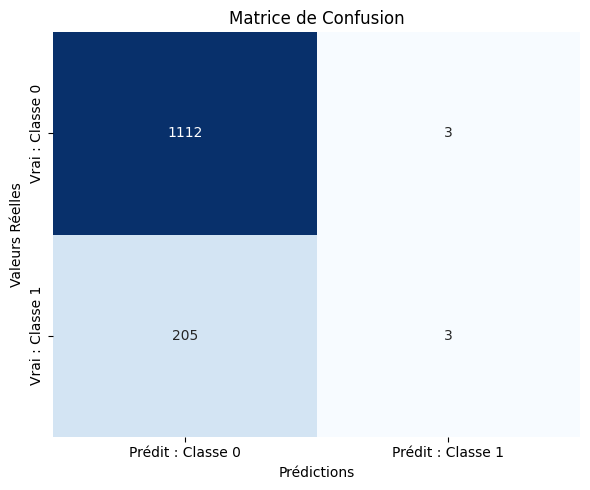

In [42]:
matrice = confusion_matrix(y_test, y_pred_k)

# Tracé de la matrice de confusion
plt.figure(figsize=(6, 5))
sns.heatmap(matrice, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Prédit : Classe 0', 'Prédit : Classe 1'],
            yticklabels=['Vrai : Classe 0', 'Vrai : Classe 1'])

plt.title("Matrice de Confusion")
plt.xlabel("Prédictions")
plt.ylabel("Valeurs Réelles")
plt.tight_layout()
plt.show()

In [43]:
print("\nRapport de classification :\n", classification_report(y_test, y_pred_k))


Rapport de classification :
               precision    recall  f1-score   support

          No       0.84      1.00      0.91      1115
         Yes       0.50      0.01      0.03       208

    accuracy                           0.84      1323
   macro avg       0.67      0.51      0.47      1323
weighted avg       0.79      0.84      0.78      1323



In [79]:
y_pred_proba = knn.predict_proba(X_test_scaled)[:, 1]
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

ROC-AUC Score: 0.7718696102104174


In [80]:
# Conversion de 'Yes' en 1 et 'No' en 0 dans y_test
y_test_numeric = pd.Categorical(y_test.replace({"yes": 1, "no": 0}))

# Vérification des valeurs manquantes dans y_test_numeric
print(y_test_numeric.isnull().sum())


0


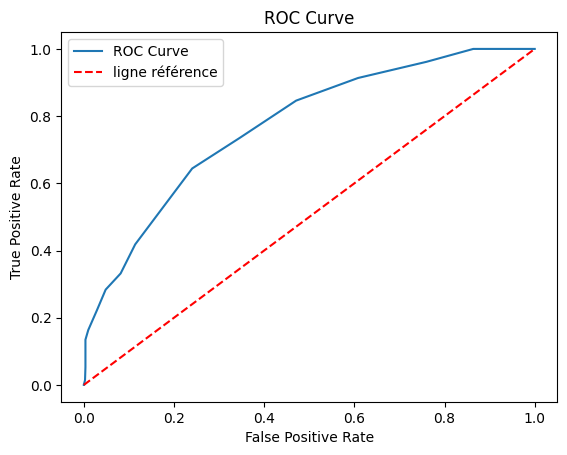

In [81]:
# Calcul de la courbe ROC
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test_numeric, y_pred_proba)
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='ligne référence')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [44]:
n_features = 42  # Nombre de caractéristiques des données
n_samples = 5   # Nombre d'exemples que vous souhaitez générer

# Générer des données aléatoires
new_data = np.random.rand(n_samples, n_features)  # Génère des valeurs entre 0 et 1

# Prédictions pour les nouvelles données
new_predictions = knn.predict(new_data)

print("Nouvelles données (X) :\n", new_data)
print("\nPrédictions (y) :\n", new_predictions)

Nouvelles données (X) :
 [[4.58676603e-01 8.41810199e-01 3.01256029e-01 9.60603320e-01
  3.36937635e-01 8.52751328e-01 2.39395104e-01 2.67191414e-01
  4.06706739e-01 3.43478124e-01 3.62611598e-01 7.52894567e-01
  1.58127129e-01 4.83704051e-01 5.97501977e-01 3.69955427e-01
  8.15097602e-01 9.60279449e-02 3.25339420e-01 7.03595579e-01
  4.06553802e-01 6.05895998e-01 6.02625565e-01 9.40422372e-01
  9.19499132e-01 8.17574266e-01 9.06719480e-01 9.50278529e-01
  3.27888908e-01 7.98777171e-01 3.77266244e-01 2.32890281e-01
  2.02270823e-01 6.42364435e-01 9.03562391e-01 2.04314493e-01
  3.86616567e-01 4.50579624e-01 6.05722516e-02 6.52927556e-01
  1.15069034e-01 6.01312219e-01]
 [9.10941675e-01 2.22990084e-01 4.67989457e-01 3.83803916e-01
  2.66188564e-02 6.30136088e-01 8.26519756e-01 4.89298713e-01
  3.14243659e-01 3.47929317e-01 4.53813899e-01 8.06867505e-01
  8.39695245e-01 9.87406329e-01 2.57295623e-01 1.99218901e-01
  5.12049513e-01 2.27827817e-01 7.02120142e-01 6.05142955e-01
  3.04795935

In [45]:
# Modèle
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [46]:
# Évaluation
y_pred_l = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred_l))

Accuracy: 0.8594104308390023


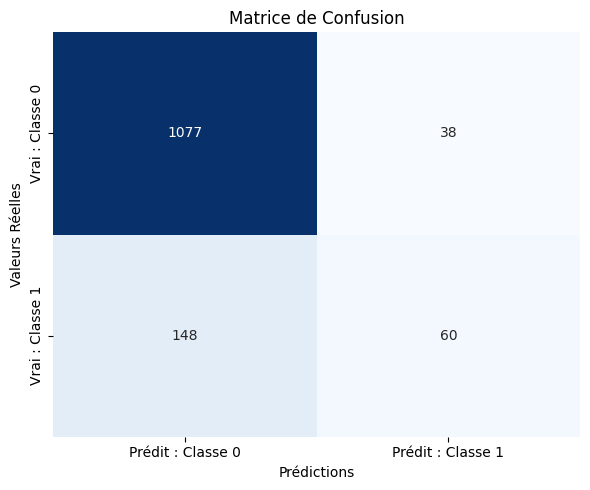

In [47]:
matrice = confusion_matrix(y_test, y_pred_l)

# Tracé de la matrice de confusion
plt.figure(figsize=(6, 5))
sns.heatmap(matrice, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Prédit : Classe 0', 'Prédit : Classe 1'],
            yticklabels=['Vrai : Classe 0', 'Vrai : Classe 1'])

plt.title("Matrice de Confusion")
plt.xlabel("Prédictions")
plt.ylabel("Valeurs Réelles")
plt.tight_layout()
plt.show()

In [48]:
print(classification_report(y_test, y_pred_l))

              precision    recall  f1-score   support

          No       0.88      0.97      0.92      1115
         Yes       0.61      0.29      0.39       208

    accuracy                           0.86      1323
   macro avg       0.75      0.63      0.66      1323
weighted avg       0.84      0.86      0.84      1323



In [65]:
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


ROC-AUC Score: 0.8024749913763366


In [72]:
# Conversion de 'Yes' en 1 et 'No' en 0 dans y_test
y_test_numeric = pd.Categorical(y_test.replace({"yes": 1, "no": 0}))

# Vérification des valeurs manquantes dans y_test_numeric
print(y_test_numeric.isnull().sum())


0


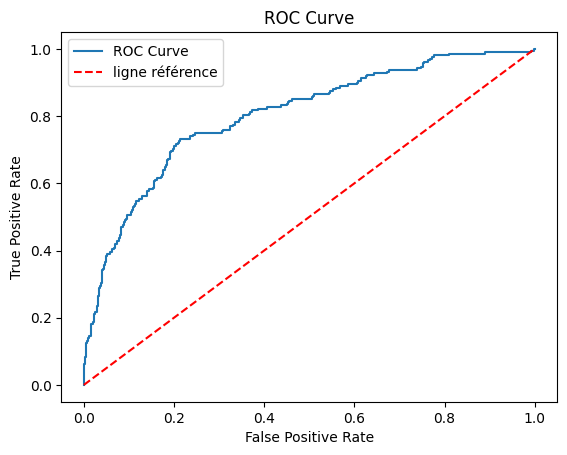

In [78]:

# Calcul de la courbe ROC
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test_numeric, y_pred_proba)
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='ligne référence')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [51]:
# Conversion manuelle
y_train = y_train.replace({'No': 0, 'Yes': 1})
y_test = y_test.replace({'No': 0, 'Yes': 1})
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)


LinearRegression()

In [52]:
y_predict_li = lin_reg.predict(X_test_scaled)
# Réalisation de la prédiction avec un modèle de régression linéaire (lin_reg)
print("Predictions:", y_predict_li)  # Prédictions basées sur les données préparées

Predictions: [-0.12992565  0.35731194 -0.03337161 ...  0.07581774  0.09669118
  0.08720181]


In [53]:
# Évaluer la performance
mse = mean_squared_error(y_test, y_predict_li)  # Erreur quadratique moyenne
r2 = r2_score(y_test, y_predict_li)            # Coefficient de détermination

print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R²):", r2)

Mean Squared Error (MSE): 0.11128777388405682
Coefficient of Determination (R²): 0.16009736989174161


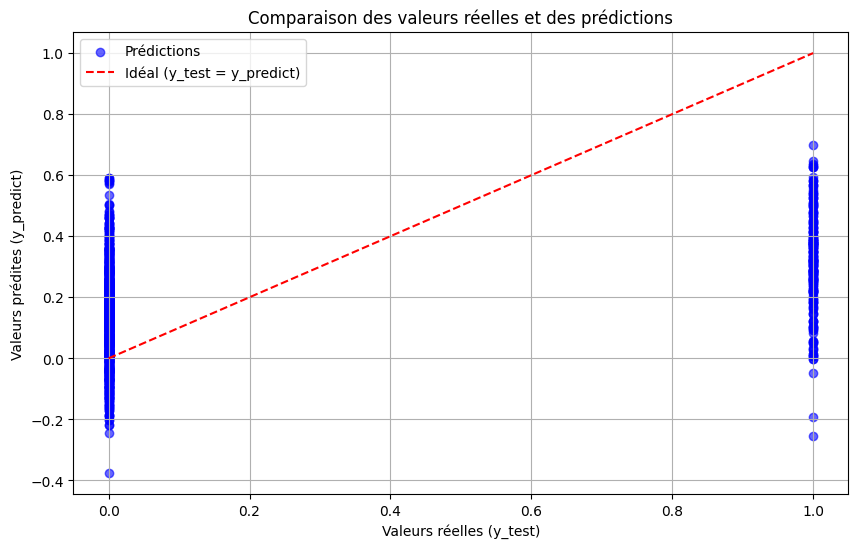

In [54]:
# Tracer le graphe
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predict_li, alpha=0.6, color='blue', label="Prédictions")
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label="Idéal (y_test = y_predict)")
plt.title("Comparaison des valeurs réelles et des prédictions")
plt.xlabel("Valeurs réelles (y_test)")
plt.ylabel("Valeurs prédites (y_predict)")
plt.legend()
plt.grid(True)
plt.show()

In [55]:
# 4. Entraîner le modèle SVM avec un noyau linéaire (kernel='linear')
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [56]:
# 5. Prédire les labels pour l'ensemble de test
y_pred_s = svm_model.predict(X_test_scaled)

# 6. Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred_s)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.91


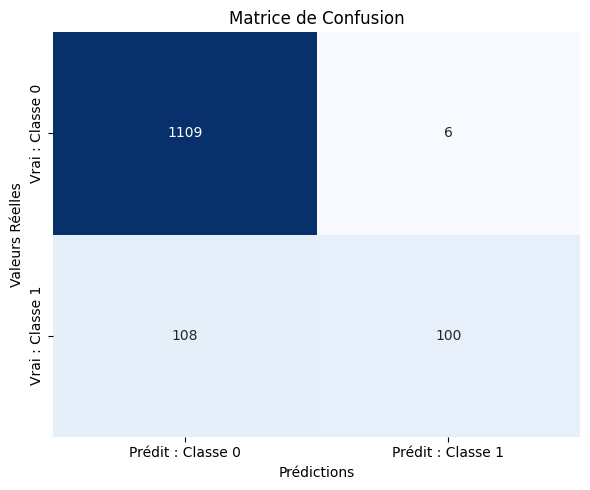

In [57]:
matrice = confusion_matrix(y_test, y_pred_s)

# Tracé de la matrice de confusion
plt.figure(figsize=(6, 5))
sns.heatmap(matrice, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Prédit : Classe 0', 'Prédit : Classe 1'],
            yticklabels=['Vrai : Classe 0', 'Vrai : Classe 1'])

plt.title("Matrice de Confusion")
plt.xlabel("Prédictions")
plt.ylabel("Valeurs Réelles")
plt.tight_layout()
plt.show()

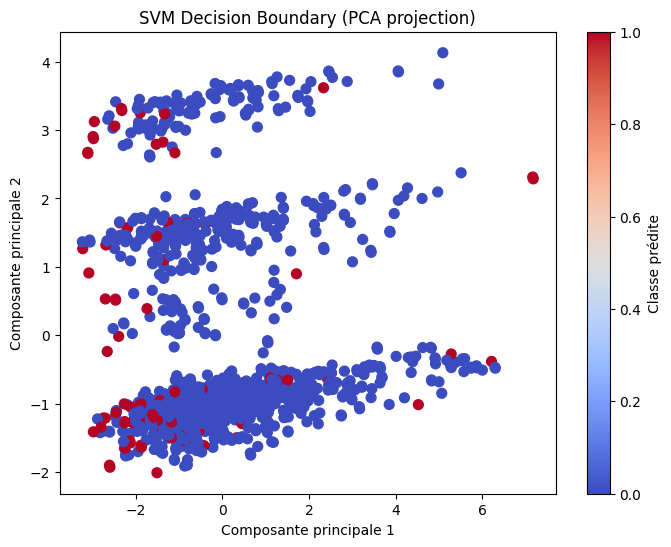

In [58]:
# 7. Visualiser (si nécessaire, par exemple dans un cas 2D)
# Réduire la dimensionnalité des données pour une visualisation 2D (PCA)
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train_scaled)
X_test_2d = pca.transform(X_test_scaled)

# Tracer les données de test et les frontières de décision
plt.figure(figsize=(8, 6))
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_pred_s, cmap=plt.cm.coolwarm, s=50)
plt.title("SVM Decision Boundary (PCA projection)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.colorbar(label='Classe prédite')
plt.show()

In [59]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_s))


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1115
           1       0.94      0.48      0.64       208

    accuracy                           0.91      1323
   macro avg       0.93      0.74      0.79      1323
weighted avg       0.92      0.91      0.90      1323



In [60]:
# Créer et entraîner le modèle Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [61]:
# Prédictions sur les données de test
y_pred_r = rf_model.predict(X_test_scaled)

# Évaluer les performances du modèle
print("Précision:", accuracy_score(y_test, y_pred_r))

Précision: 0.9795918367346939



Matrice de confusion:


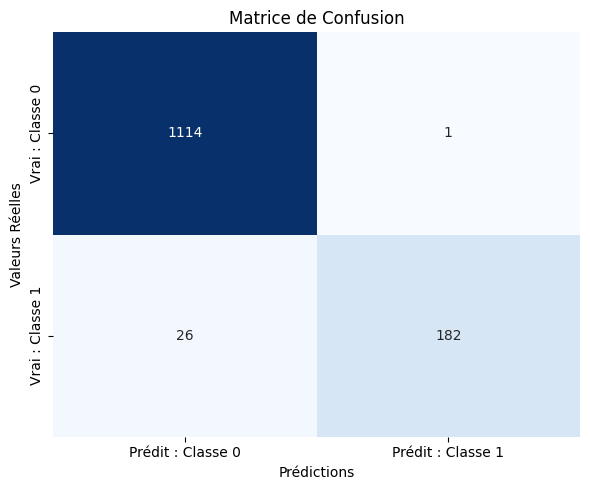

In [62]:
print("\nMatrice de confusion:")
matrice = confusion_matrix(y_test, y_pred_r)

# Tracé de la matrice de confusion
plt.figure(figsize=(6, 5))
sns.heatmap(matrice, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Prédit : Classe 0', 'Prédit : Classe 1'],
            yticklabels=['Vrai : Classe 0', 'Vrai : Classe 1'])

plt.title("Matrice de Confusion")
plt.xlabel("Prédictions")
plt.ylabel("Valeurs Réelles")
plt.tight_layout()
plt.show()

In [63]:
print("\nRapport de classification:")
print(classification_report(y_test, y_pred_r))


Rapport de classification:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1115
           1       0.99      0.88      0.93       208

    accuracy                           0.98      1323
   macro avg       0.99      0.94      0.96      1323
weighted avg       0.98      0.98      0.98      1323



In [73]:
from sklearn.metrics import roc_auc_score, roc_curve
y_pred_proba_r = rf_model.predict_proba(X_test_scaled)[:, 1]
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


ROC-AUC Score: 0.8024749913763366


In [74]:
# Conversion de 'Yes' en 1 et 'No' en 0 dans y_test
y_test_numeric = pd.Categorical(y_test.replace({"yes": 1, "no": 0}))

# Vérification des valeurs manquantes dans y_test_numeric
print(y_test_numeric.isnull().sum())


0


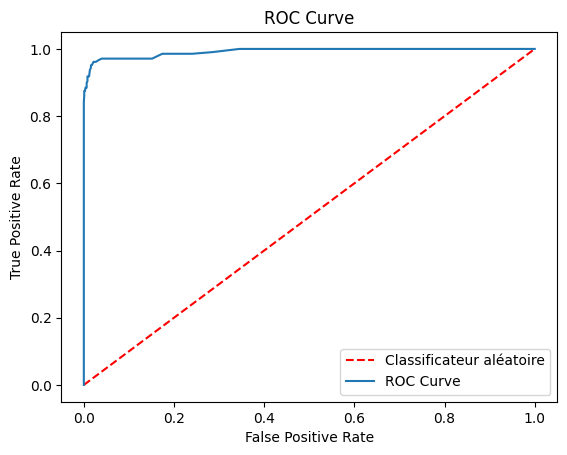

In [77]:

# Calcul de la courbe ROC
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test_numeric, y_pred_proba_r)
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Classificateur aléatoire')
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
